In [1]:
import numpy as np
import pandas as pd

In [3]:
file_path = "E:\Assingnment\Student Performance Analysis.xlsx.xlsx"
data = pd.ExcelFile(file_path)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\User\AppData\Local\Temp\ipykernel_13512\495768098.py:1: SyntaxWarning: invalid escape sequence '\A'
  file_path = "E:\Assingnment\Student Performance Analysis.xlsx.xlsx"


## Data Preparation

In [5]:
#Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
marks = pd.read_excel(data, sheet_name='Marks')
attendance = pd.read_excel(data, sheet_name='Attendance')

In [8]:
marks.head(5)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment
0,Arjun,9,5,14,16.0
1,Sophia Hardy,8,9,113,19.0
2,RAj,10,10,15,20.0
3,Emily,9,7,11,16.0
4,Ishaan Saini,8,7,14,11.0


In [10]:
attendance.head(5)

,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,Y,N,N,N,Y
1,Sophia Hardy,Y,N,N,Y,Y
2,RAj,Y,Y,Y,Y,Y
3,Emily,Y,Y,N,Y,Y
4,Ishaan Saini,N,N,N,N,Y


In [12]:
#Merge the two DataFrames on the Name column to create a single DataFrame.
merged = pd.merge(marks, attendance, on='Name')

In [14]:
#Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').
attendance_columns = [col for col in merged.columns if "Attendance" in col]
merged[attendance_columns] = merged[attendance_columns].replace({'Y': 1, 'N': 0})

C:\Users\User\AppData\Local\Temp\ipykernel_13512\1795754755.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged[attendance_columns] = merged[attendance_columns].replace({'Y': 1, 'N': 0})


In [16]:
merged.head(3)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,RAj,10,10,15,20.0,1,1,1,1,1


In [18]:
#Deal with the missing values
import numpy as np
merged.replace(to_replace='^\s*$', value=np.nan, regex=True, inplace=True)


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_13512\1771985283.py:3: SyntaxWarning: invalid escape sequence '\s'
  merged.replace(to_replace='^\s*$', value=np.nan, regex=True, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13512\1771985283.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged.replace(to_replace='^\s*$', value=np.nan, regex=True, inplace=True)


In [20]:
merged.isnull().sum()

Name                0
Mini Test 1         7
Mini Test 2         4
Live Test           3
Assignment          1
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64

In [22]:
merged.fillna(0, inplace=True)

In [24]:
merged.isnull().sum()

Name                0
Mini Test 1         0
Mini Test 2         0
Live Test           0
Assignment          0
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64

In [26]:
merged.head(23)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1
2,RAj,10.0,10.0,15.0,20.0,1,1,1,1,1
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1
5,OliviA,9.0,7.0,8.0,15.0,0,1,0,1,1
6,Maya,10.0,10.0,15.0,20.0,0,0,0,1,1
7,Liam,6.0,9.0,13.0,12.0,0,0,1,0,0
8,Ravi Ahuja,10.0,7.0,13.0,14.0,1,0,1,1,0
9,James,6.0,6.0,10.0,13.0,1,0,1,0,0


In [27]:
#Do the column cleaning like name column is the combination of upper and lower case.
merged['Name'] = merged['Name'].str.title()

In [29]:
merged.head(3)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1


## Data Transformation

In [33]:
# Total marks for each student.
marks_columns=["Mini Test 1","Mini Test 2", "Live Test","Assignment"]
merged["Total"]=merged[marks_columns].astype(float).sum(axis=1)

In [35]:
merged.head(2)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0


In [37]:
#Percentage marks for each student.
marks_columns=["Mini Test 1","Mini Test 2", "Live Test","Assignment"]
total =merged[marks_columns].max().sum()
merged["Percentage"]=((merged["Total"]/total)*100).round(2)

In [39]:
merged.head(2)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,28.76
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39


In [45]:
#Attendance percentage for each student based on attendance columns.
attendance_columns=["Attendance Day 1","Attendance Day 2","Attendance Day 3","Attendance Day 4","Attendance Day 5"]
merged["total_atten"] =merged[attendance_columns].sum(axis=1)
total_sessions = len(attendance_columns)
merged["Attendance percentage"]=((merged['total_atten']/total_sessions)*100)

In [47]:
merged.head(3)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage,total_atten,Attendance percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,28.76,2,40.0
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39,3,60.0
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,35.95,5,100.0


In [55]:
# Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
columns_to_weight = ['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']
merged['Weighted Percentage'] = (
    (merged['Attendance percentage'] * 0.40) +
    (merged['Mini Test 1'] * 0.10) +
    (merged['Mini Test 2'] * 0.10) +
    (merged['Live Test'] * 0.20) +
    (merged['Assignment'] * 0.20)
)
merged['Weighted Percentage'] = merged['Weighted Percentage'].round(2)

In [57]:
merged.head(2)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage,total_atten,Attendance percentage,Weighted Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,28.76,2,40.0,23.4
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39,3,60.0,52.1


In [59]:
#Classify each student's performance into categories:
import numpy as np
conditions = [
    (merged['Weighted Percentage'] >= 85),
    (merged['Weighted Percentage'] >= 71) & (merged['Weighted Percentage'] <= 84),
    (merged['Weighted Percentage'] >= 50) & (merged['Weighted Percentage'] <= 70),
    (merged['Weighted Percentage'] < 50)
]
performance_labels = ['Excellent', 'Good', 'Average', 'Needs Improvement']
merged['Performance Category'] = np.select(conditions, performance_labels)

In [61]:
merged.head(4)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage,total_atten,Attendance percentage,Weighted Percentage,Performance Category
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,28.76,2,40.0,23.4,Needs Improvement
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39,3,60.0,52.1,Average
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,35.95,5,100.0,49.0,Needs Improvement
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,28.10,4,80.0,39.0,Needs Improvement


## Analysis

In [74]:
#Identify students with attendance below 75% but weighted percentage >50%.
low_attendance_high_score = merged[
    (merged['Attendance percentage'] < 75) &
    (merged['Weighted Percentage'] > 50)
]
low_attendance_high_score

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage,total_atten,Attendance percentage,Weighted Percentage,Performance Category
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39,3,60.0,52.1,Average


In [76]:
# Highlight the top three students based on percentage marks.
merged.sort_values(by='Percentage', ascending=False).head(3)

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total,Percentage,total_atten,Attendance percentage,Weighted Percentage,Performance Category
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,97.39,3,60.0,52.1,Average
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,35.95,5,100.0,49.0,Needs Improvement
6,Maya,10.0,10.0,15.0,20.0,0,0,0,1,1,55.0,35.95,2,40.0,25.0,Needs Improvement


In [84]:
#Impact of attendance on Tests/Assignment marks.
correlation_df = merged[['Attendance percentage', 'Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']]
attendance_correlations = correlation_df.corr()
attendance_correlations.loc['Attendance percentage'].round(2)


Attendance percentage    1.00
Mini Test 1             -0.07
Mini Test 2             -0.02
Live Test                0.05
Assignment              -0.05
Name: Attendance percentage, dtype: float64

## Visualization

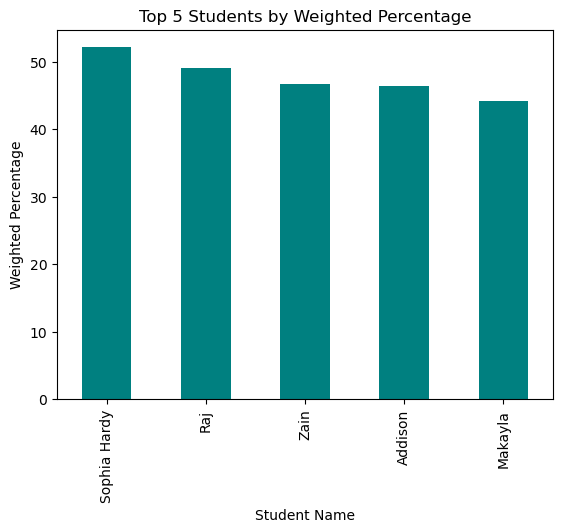

In [91]:
#Create a bar chart displaying weighted percentages for top 5 students.
import matplotlib.pyplot as plt
top5 = merged.sort_values(by='Weighted Percentage', ascending=False).head(5)
top5.plot(x='Name',y='Weighted Percentage',kind='bar',legend=False,color='#008080',title='Top 5 Students by Weighted Percentage')
plt.ylabel('Weighted Percentage')
plt.xlabel('Student Name')
plt.show()

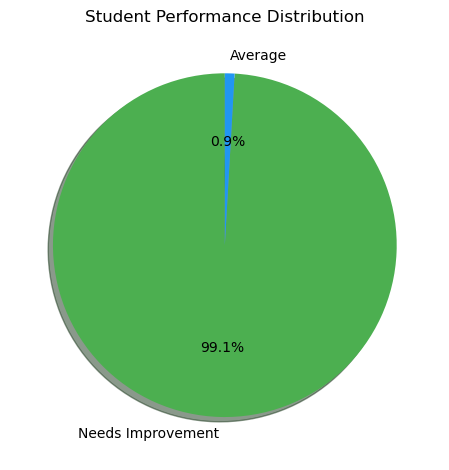

In [120]:
#Create a pie chart showing the distribution of students across the four performance categories.
category_counts = merged['Performance Category'].value_counts()
category_counts.plot(kind='pie',autopct='%1.1f%%', startangle=90,shadow=True, colors=['#4CAF50', '#2196F3', '#FFC107', '#F44336'], title='Student Performance Distribution',ylabel='')
plt.tight_layout()
plt.show()

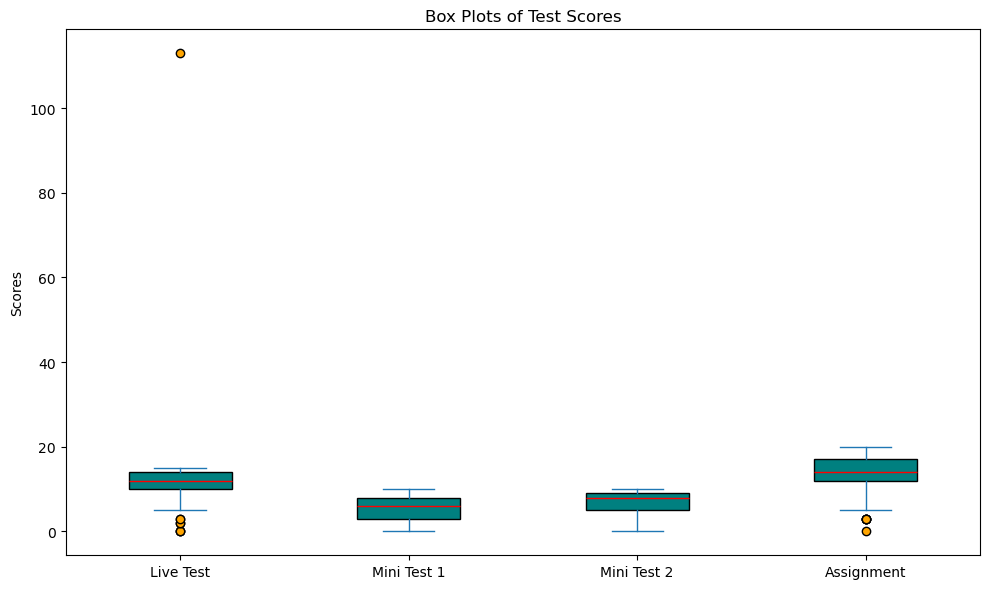

In [122]:
# Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
test_columns = ['Live Test', 'Mini Test 1', 'Mini Test 2', 'Assignment']
merged[test_columns].plot(kind='box',figsize=(10, 6),patch_artist=True,boxprops=dict(facecolor='#008080', color='black'),medianprops=dict(color='red'),flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'),title='Box Plots of Test Scores')
plt.ylabel('Scores')
plt.tight_layout()
plt.show()

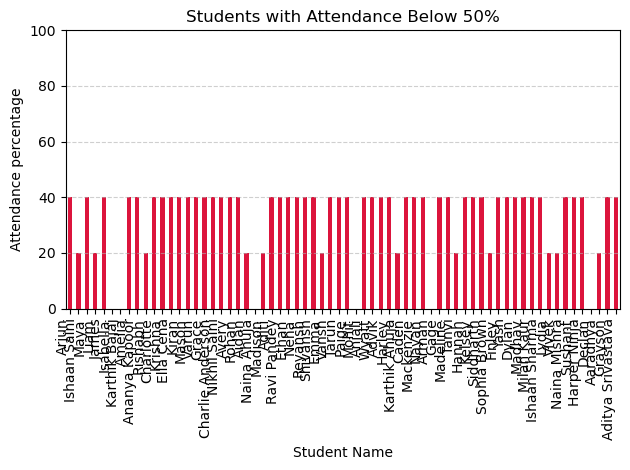

In [128]:
#Create a chart to show the students where attendance is less than 50%.
import matplotlib.pyplot as plt
low_attendance = merged[merged['Attendance percentage'] < 50]
low_attendance.plot(x='Name',y='Attendance percentage',kind='bar',color='crimson',title='Students with Attendance Below 50%',legend=False)
plt.ylabel('Attendance percentage')
plt.xlabel('Student Name')
plt.ylim(0, 100)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


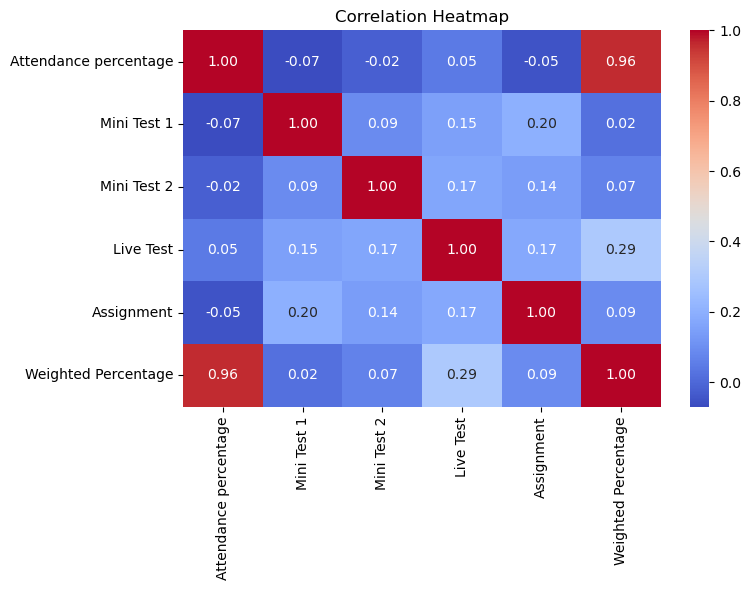

In [132]:
#Any other visualization/analysis which you can infer from data for the management.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    merged[['Attendance percentage', 'Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment', 'Weighted Percentage']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
